   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

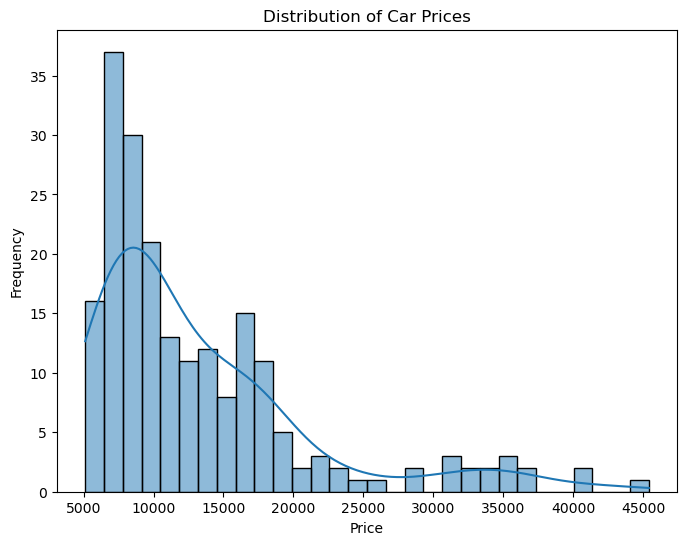

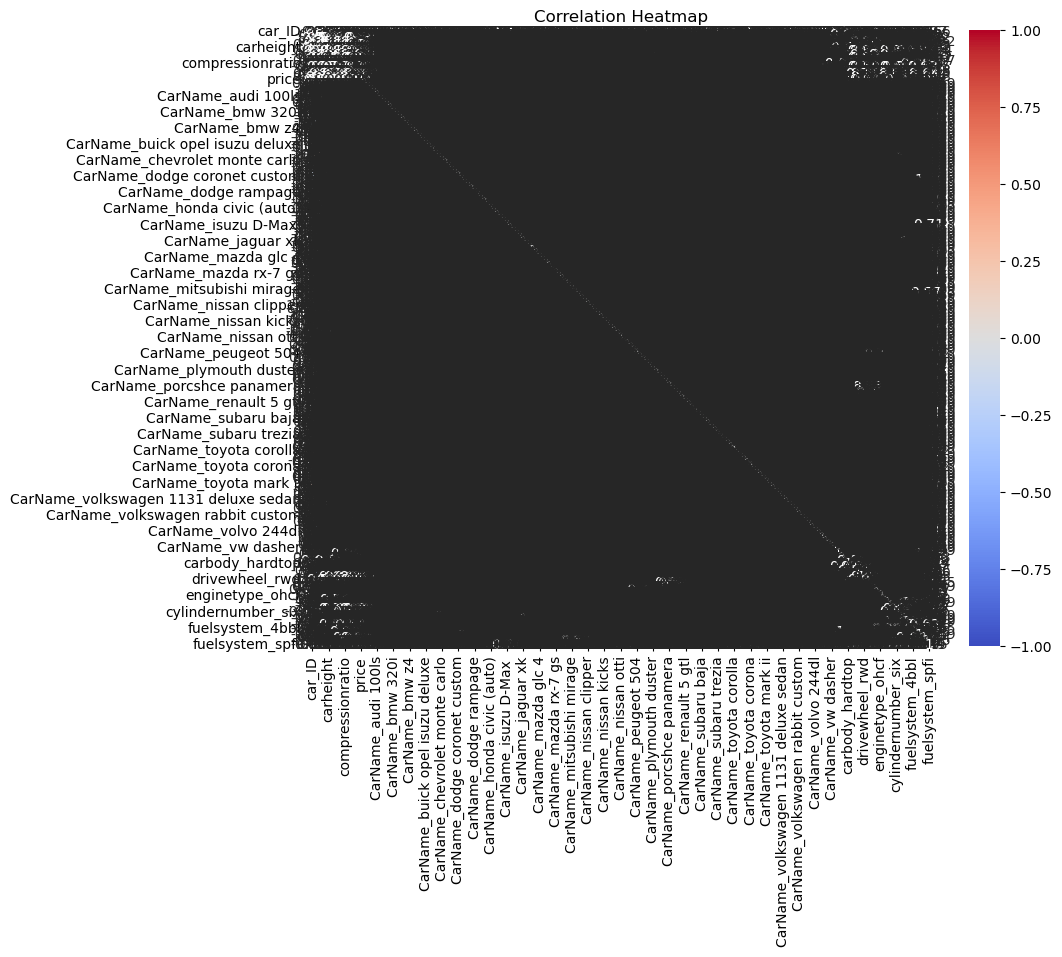

Training data shape: (143, 190)
Test data shape: (62, 190)
Coefficients: [ 2.79819301e+02  7.54025603e+02 -1.37478725e+02 -1.01902015e+02
  6.06769669e+02 -4.93332102e+01  1.18371714e+01  3.90171548e+01
 -2.01643653e+03 -1.63939090e+03 -3.84704580e+02 -2.07211281e+01
  4.02108075e+00  4.27277337e+02 -2.82184270e+02  2.79042048e+04
  2.67467432e+04  2.94719239e+04  2.91619893e+04  3.98249898e+03
  5.79567253e+03  5.41695678e+03  9.40997325e-09 -5.00875785e-10
  3.29891579e+04  4.47403686e+04  4.44460716e+04 -8.45830073e-11
  4.13854195e-09  4.27143006e+04 -1.62162905e-09 -2.41561793e-09
  4.01723810e-09 -1.02045306e-09  3.48214999e+03  8.36671523e+03
 -6.92654399e+02 -4.24526844e+03 -6.07542461e-10 -7.27595761e-11
  1.78095791e+04  1.85246564e+04  1.61456771e+04  1.45882950e-09
  1.63305132e+04  3.81987775e-10  1.85900738e+04  1.94872990e+04
 -3.16504156e-09  1.62862115e+04  1.59642761e+04  1.43536173e+04
  1.51853277e+04  1.55369872e+04  1.25292936e+04 -4.16184776e-09
  1.61724788e+04 

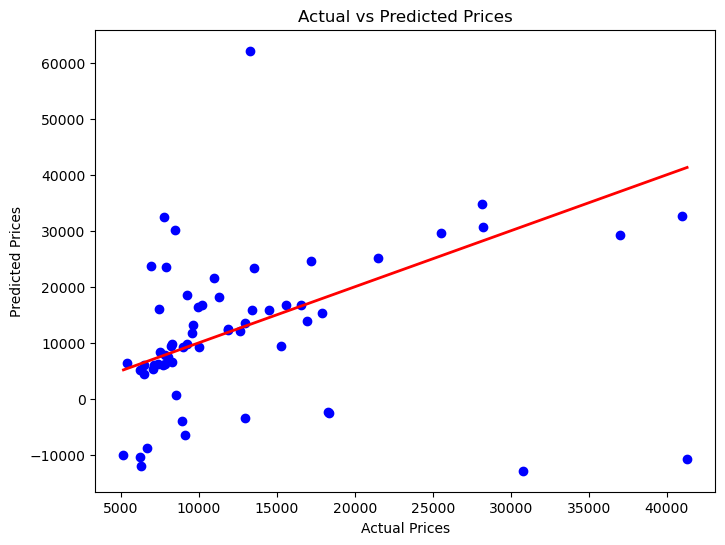

In [5]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Load the dataset from the CSV file
df = pd.read_csv('C:/Users/ADMIN/Desktop/CarData.csv')  # Make sure to specify the correct path to your CSV file

# Check the first few rows of the dataset
print(df.head())

# Check the data types of the columns
print(df.dtypes)

# Convert categorical features to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Visualize the distribution of car prices
plt.figure(figsize=(8,6))
sns.histplot(df['price'], bins=30, kde=True)  # Assuming 'price' is the target variable
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Visualize the correlation between features and the target variable
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Define features (X) and target (y)
X = df_encoded.drop(columns=['price'])  # Features (drop the target column)
y = df_encoded['price']  # Target (price column)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of the train and test sets
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Display the coefficients and intercept of the model
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# Make predictions
y_pred = model.predict(X_test)

# Display the first few predictions alongside actual prices
df_predictions = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
print(df_predictions.head())

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Visualize actual vs predicted prices
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # 45-degree line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()
